This notebook prepares the data for training a ML model on it and an actual ML training.

We need to build 2 models where one of them predicts the chance of rainfall today and another predicts the chance of rainfall tomorrow.

## Prepare the data

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [29]:
data = pd.read_csv("./dataset/rainfall_processed.csv")

### Standardizing the data

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
#splitting the data into independent variable (x) and dependent variable (y)
#where y is the RainToday

y = data["RainToday"]
x = data.drop("RainToday", axis=1)

In [32]:
#Get the columns names of x
feature_names = x.columns

In [33]:
#Initialize the StandardScaler
sc = StandardScaler()

#Transforming the data using transform
x = sc.fit_transform(x) #outputs an array
#convert the array into dataframe
x = pd.DataFrame(x, columns=feature_names)

### Splitting the data into Train and Test set

In [34]:
print(f"Number of samples in the dataset: {len(x)}")

Number of samples in the dataset: 145460


In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

In [36]:
print(f"Number of training samples: {len(y_train)}")
print(f"Number of testing samples: {len(y_test)}")

Number of training samples: 116368
Number of testing samples: 29092


## Machine Learning

### Training the model

We'll be using RandomForest from sklearn as our model. We can also use Gradient Boosting method from XGBoost as our ML algorithm.

In [72]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [73]:
model.fit(x_train, y_train)

LogisticRegression()

### Evaluating the model

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [75]:
predictions = model.predict(x_test)

In [76]:
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision: {precision_score(y_test, predictions)}")
print(f"Recall: {recall_score(y_test, predictions)}")
print(f"F1 Scorel: {f1_score(y_test, predictions)}")

Accuracy: 0.9544204592327787
Precision: 0.9084756687077022
Recall: 0.8814884302689181
F1 Scorel: 0.8947786065703857


In [77]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [78]:
confusion_matrix = confusion_matrix(y_test, predictions)

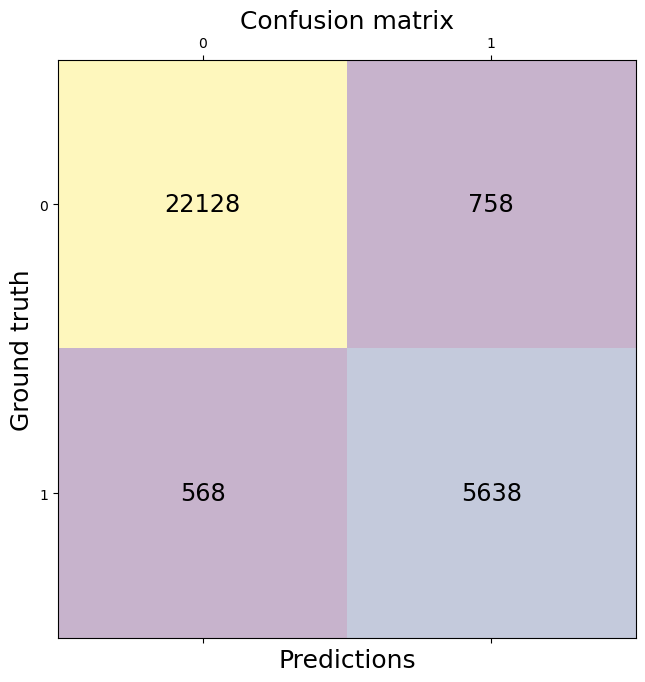

In [79]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.matshow(confusion_matrix, alpha=0.3)
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=i, y=j, s=confusion_matrix[i,j], va='center', ha='center', size='xx-large')
plt.xlabel("Predictions", fontsize=18)
plt.ylabel("Ground truth", fontsize=18)
plt.title("Confusion matrix", fontsize=18)
plt.show()

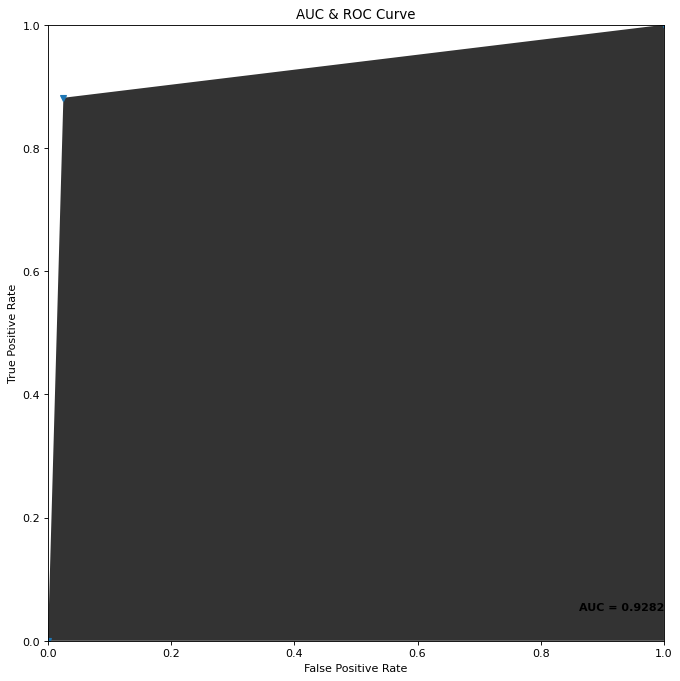

In [81]:
auc = roc_auc_score(y_test, predictions)

fpr, tpr, thresholds = roc_curve(y_test, predictions)

plt.figure(figsize=(12,10), dpi=80)
plt.axis('scaled')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'v')
plt.fill_between(fpr, tpr, facecolor='black', alpha=0.8)
plt.text(1, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=10, weight='bold', color='black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Save the model

In [70]:
import pickle

In [71]:
pickle.dump(model, open("./saved models/model.pkl", "wb"))
pickle.dump(sc, open("./saved models/scaler.pkl", "wb"))